IMPORT LIBRARIES

In [1]:
import warnings
warnings.filterwarnings('ignore')

# for some basic operations
import numpy as np 
import pandas as pd 

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import plotting

# for modelling
import sklearn
import imblearn


LOAD DATASET

In [2]:
# let's import the data
data = pd.read_csv('Skyserver.csv')

# let's take a look at the data
pd.set_option('display.max_columns', None)
data.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [3]:
# let's check the shape of the dataset

print("shape of the dataset is ", data.shape)

shape of the dataset is  (10000, 18)


In [4]:
# let's get the information about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [5]:
data.nunique()

objid            1
ra           10000
dec          10000
u             9730
g             9817
r             9852
i             9890
z             9896
run             23
rerun            1
camcol           6
field          703
specobjid     6349
class            3
redshift      9637
plate          487
mjd            355
fiberid        892
dtype: int64

In [6]:
print("run",data.run.unique())
print("camcol",data.camcol.unique())
print("class",data['class'].unique())

run [ 752  756  308  727  745 1035 1045 1140 1231 1332 1334 1302 1239 1119
 1331 1345 1350 1404 1412 1336 1402 1411 1356]
camcol [4 2 1 5 6 3]
class ['STAR' 'GALAXY' 'QSO']


In [7]:
data.drop_duplicates(inplace=True)
data.shape

(10000, 18)

In [8]:
data.isnull().sum(axis=0).sort_values()

#NO ANY NULL VALUES IN DATASET

objid        0
plate        0
redshift     0
class        0
specobjid    0
field        0
camcol       0
rerun        0
run          0
z            0
i            0
r            0
g            0
u            0
dec          0
ra           0
mjd          0
fiberid      0
dtype: int64

In [9]:
data1=data.copy()
data1.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [10]:
from sklearn.preprocessing import LabelEncoder
L_model=LabelEncoder()

for col in data1.columns:
    data1[col] = L_model.fit_transform(data1[col]) 
    
data1.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,0,5378,4030,8818,3143,1853,1594,1474,3,0,3,256,5641,2,1681,267,182,490
1,0,5392,4145,4066,3722,4220,4703,4956,3,0,3,256,2267,2,1437,49,6,540
2,0,5405,4118,8203,8155,7210,6793,6350,3,0,3,257,1289,0,8222,21,80,512
3,0,5458,3910,1569,1960,2431,2897,3415,3,0,3,258,5642,2,1162,267,182,509
4,0,5462,4064,1206,1255,3347,4943,5701,3,0,3,258,5642,2,3501,267,182,511


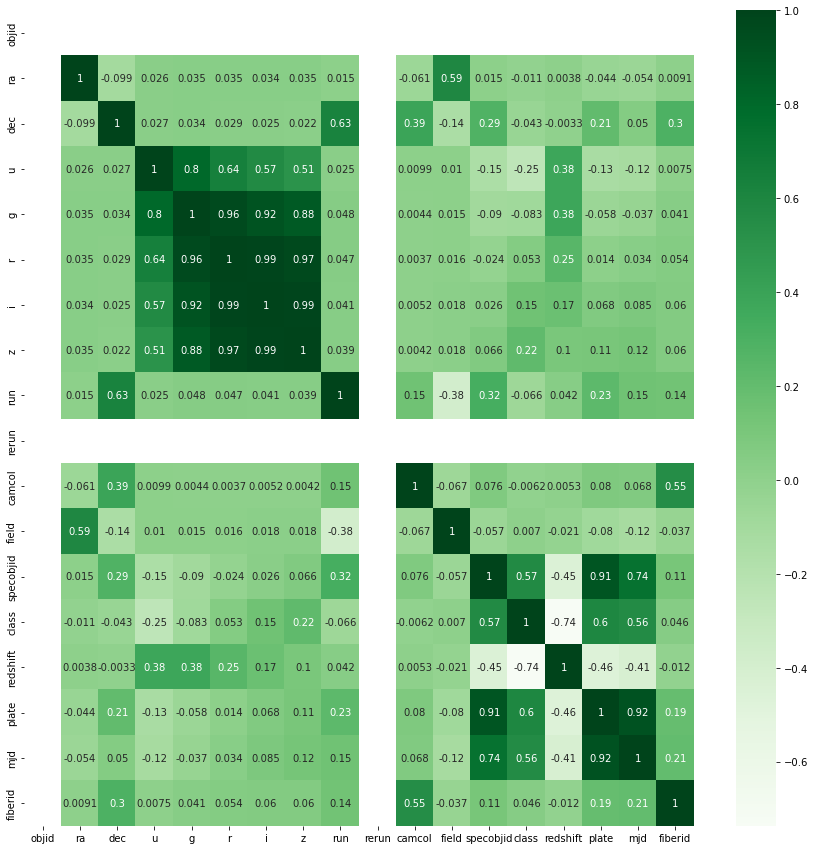

In [11]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(data1.corr(),annot=True,cmap='Greens')

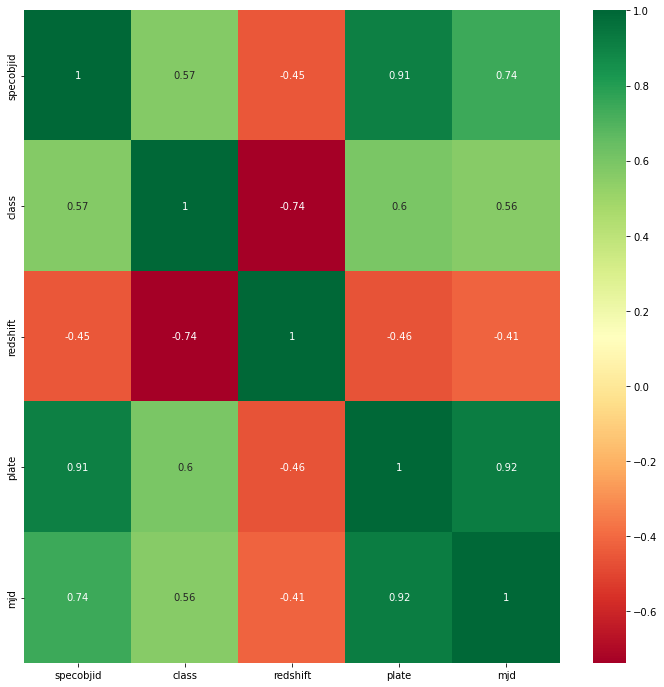

In [12]:
corrmat = data1.corr()
plt.figure(figsize=(12,12))
top_corr_features = corrmat.index[abs(corrmat["class"])>0.4]
g = sns.heatmap(data1[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [13]:
data1.drop(['objid','rerun'],1,inplace=True)
data1.head()

,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,5378,4030,8818,3143,1853,1594,1474,3,3,256,5641,2,1681,267,182,490
1,5392,4145,4066,3722,4220,4703,4956,3,3,256,2267,2,1437,49,6,540
2,5405,4118,8203,8155,7210,6793,6350,3,3,257,1289,0,8222,21,80,512
3,5458,3910,1569,1960,2431,2897,3415,3,3,258,5642,2,1162,267,182,509
4,5462,4064,1206,1255,3347,4943,5701,3,3,258,5642,2,3501,267,182,511


In [14]:
data1.corr()

,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
ra,1.000000,-0.099025,0.025992,0.034531,0.034917,0.034367,0.034826,0.015367,-0.060535,0.587106,0.015224,-0.010821,0.003844,-0.043891,-0.053590,0.009121
dec,-0.099025,1.000000,0.027279,0.033889,0.029393,0.024513,0.021956,0.625318,0.392055,-0.142701,0.287271,-0.043486,-0.003288,0.206556,0.050285,0.295278
u,0.025992,0.027279,1.000000,0.798355,0.644857,0.570774,0.507525,0.024785,0.009872,0.010133,-0.149325,-0.251365,0.381865,-0.132412,-0.117060,0.007498
g,0.034531,0.033889,0.798355,1.000000,0.959572,0.917869,0.878222,0.047607,0.004443,0.014709,-0.090095,-0.082563,0.376605,-0.057879,-0.036545,0.041139
r,0.034917,0.029393,0.644857,0.959572,1.000000,0.988125,0.969963,0.046570,0.003740,0.015729,-0.024030,0.052573,0.252699,0.014348,0.033596,0.053719
i,0.034367,0.024513,0.570774,0.917869,0.988125,1.000000,0.992448,0.041314,0.005200,0.017771,0.025687,0.146682,0.167707,0.067876,0.084789,0.059608
z,0.034826,0.021956,0.507525,0.878222,0.969963,0.992448,1.000000,0.039402,0.004185,0.018176,0.065854,0.216925,0.103689,0.108868,0.122772,0.059731
run,0.015367,0.625318,0.024785,0.047607,0.046570,0.041314,0.039402,1.000000,0.148442,-0.382701,0.323883,-0.066380,0.042437,0.232605,0.147413,0.144918
camcol,-0.060535,0.392055,0.009872,0.004443,0.003740,0.005200,0.004185,0.148442,1.000000,-0.066996,0.076472,-0.006186,0.005289,0.080126,0.067925,0.546223
field,0.587106,-0.142701,0.010133,0.014709,0.015729,0.017771,0.018176,-0.382701,-0.066996,1.000000,-0.057377,0.007005,-0.021382,-0.079826,-0.118489,-0.037365


In [15]:
data1['class'].value_counts()

#GALAXY = 4998, star = 4152, qso = 850

0    4998
2    4152
1     850
Name: class, dtype: int64

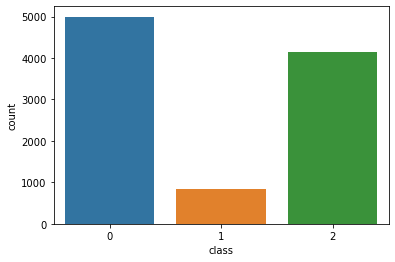

In [16]:
sns.countplot(x=data1['class'])

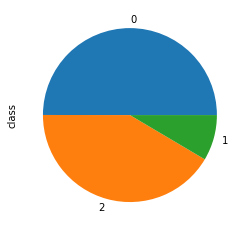

In [17]:
data1['class'].value_counts().plot.pie(y='class')

Text(0.5, 1.0, 'MJD of observation')

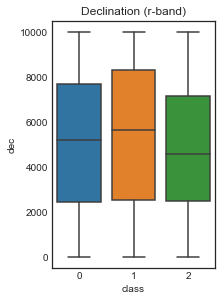

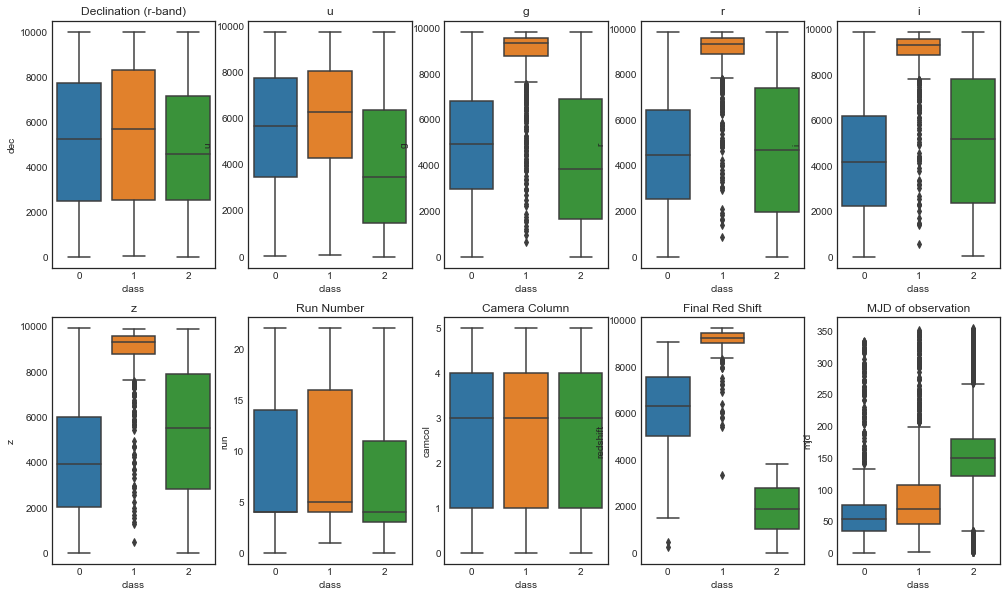

In [18]:
plt.figure(figsize = (17, 10))
plt.style.use('seaborn-white')
ax=plt.subplot(2,5,1)
sns.boxplot(x='class',y='dec',data=data1)
ax.set_title('Declination (r-band)')
plt.figure(figsize = (17, 10))
plt.style.use('seaborn-white')
ax=plt.subplot(2,5,1)
sns.boxplot(x='class',y='dec',data=data1)
ax.set_title('Declination (r-band)')
ax=plt.subplot(2,5,2)
sns.boxplot(x='class',y='u',data=data1)
ax.set_title('u')
ax=plt.subplot(2,5,3)
sns.boxplot(x='class',y='g',data=data1)
ax.set_title('g')
ax=plt.subplot(2,5,4)
sns.boxplot(x='class',y='r',data=data1)
ax.set_title('r')
ax=plt.subplot(2,5,5)
sns.boxplot(x='class',y='i',data=data1)
ax.set_title('i')
ax=plt.subplot(2,5,6)
sns.boxplot(x='class',y='z',data=data1)
ax.set_title('z')
ax=plt.subplot(2,5,7)
sns.boxplot(x='class',y='run',data=data1)
ax.set_title('Run Number')
ax=plt.subplot(2,5,8)
sns.boxplot(x='class',y='camcol',data=data1)
ax.set_title('Camera Column')
ax=plt.subplot(2,5,9)
sns.boxplot(x='class',y='redshift',data=data1)
ax.set_title('Final Red Shift')
ax=plt.subplot(2,5,10)
sns.boxplot(x='class',y='mjd',data=data1)
ax.set_title('MJD of observation')

In [21]:
from scipy.stats import zscore

#di=df.columns
z_score=zscore(data1)
print(data1.shape)
df=data1.loc[(z_score<3).all(axis=1)]
print(df.shape)

(10000, 16)
(9941, 16)


In [24]:
df['class'].value_counts()

0    4998
2    4105
1     838
Name: class, dtype: int64

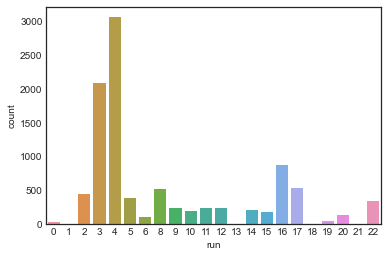

In [25]:
sns.countplot(x=df['run'])

In [32]:
df.skew()

ra          -0.009026
dec          0.011356
u           -0.025228
g           -0.005179
r            0.004489
i            0.005829
z            0.005715
run          0.998582
camcol      -0.098666
field        0.220502
specobjid   -0.320677
class        0.179850
redshift     0.065062
plate        0.869370
mjd          1.145583
fiberid      0.147784
dtype: float64

In [33]:
x = df.drop(['class'], axis = 1)
y = df['class']

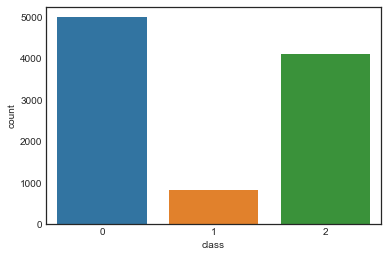

In [26]:
sns.countplot(x=df['class'])

In [35]:
class0 = df[df['class']==0]
class1 = df[df['class']==1]
class2 = df[df['class']==2]

In [36]:
from imblearn.under_sampling import NearMiss

nm = NearMiss(sampling_strategy='auto')
x,y = nm.fit_sample(x,y)


In [37]:
x.shape, y.shape

((2514, 15), (2514,))

In [38]:
from sklearn.preprocessing import StandardScaler 
STD=StandardScaler()
x=STD.fit_transform(x)

In [39]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

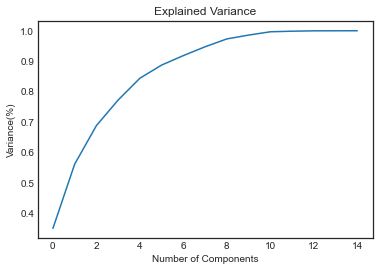

In [40]:
from sklearn.decomposition import PCA
pca = PCA()
PrincipalComponents = pca.fit_transform(x)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance(%)')
plt.title('Explained Variance')
plt.show()

In [42]:
pca = PCA(n_components = 11)
new_data = pca.fit_transform(x)
pri_x = pd.DataFrame(new_data)
pri_x

,0,1,2,3,4,5,6,7,8,9,10
0,-3.328420,1.424400,0.903703,2.234072,1.288575,-0.397395,-0.208722,-0.475782,0.274960,0.263309,-0.597747
1,-2.190961,-0.560431,-0.823518,-1.865586,-0.524312,-0.907363,0.236296,0.251069,-0.698168,0.189384,0.770921
2,-2.369545,1.280659,-0.314127,2.312733,1.592420,0.172999,-0.319283,0.857685,-0.116270,0.259778,-0.279165
3,-1.764390,0.727784,-1.500223,-0.229693,-0.710049,0.589438,0.138547,1.087446,-0.148967,0.796619,0.124383
4,-2.576690,0.500902,-1.478253,-1.000938,0.752958,-0.079748,-0.464643,1.267858,-0.323990,0.341999,-0.327828
...,...,...,...,...,...,...,...,...,...,...,...
2509,1.177229,4.127312,2.358068,0.815256,-1.409855,0.587156,0.327460,-0.093011,-0.418141,-0.698111,0.134140
2510,1.130713,1.587663,0.879289,0.513250,-1.001399,0.445131,-1.085200,0.127737,-0.805852,0.164099,0.457675
2511,0.775329,3.827167,1.871743,-2.559024,0.422359,1.967377,-0.974424,-0.576067,0.425571,-1.145744,-0.120432
2512,1.335952,1.352829,1.592827,-0.300395,-0.708361,0.530093,-1.119525,0.299249,-0.514372,0.036677,0.323611


In [43]:
x_train,x_test,y_train,y_test = train_test_split(pri_x,y,train_size = 0.7)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1759, 11), (755, 11), (1759,), (755,))

In [51]:
from sklearn.linear_model import LogisticRegression #models to perform on data
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import roc_curve,roc_auc_score
lg=LogisticRegression()
svc=SVC()
rndf = RandomForestClassifier()
dtc=DecisionTreeClassifier()
gb=GaussianNB()
knn=KNeighborsClassifier()
sgdc = SGDClassifier()

In [59]:
def fun(f):
    f.fit(x_train,y_train)
    pred=f.predict(x_test)
    print('Score',f.score(x_train,y_train))
    print('Accuracy Score',accuracy_score(y_test,pred)*100)
    print('Confusion Matrix\n',confusion_matrix(y_test,pred))
    print('Classification Report\n',classification_report(y_test,pred))
    
    plt.rcParams['figure.figsize'] = (5, 5)
    cm = confusion_matrix(y_test,pred)
    sns.heatmap(cm, annot = True, cmap = 'copper')
    plt.show()

Score 0.9681637293916998
Accuracy Score 95.76158940397352
Confusion Matrix
 [[246  12   0]
 [ 19 210   0]
 [  1   0 267]]
Classification Report
               precision    recall  f1-score   support

           0       0.92      0.95      0.94       258
           1       0.95      0.92      0.93       229
           2       1.00      1.00      1.00       268

    accuracy                           0.96       755
   macro avg       0.96      0.96      0.96       755
weighted avg       0.96      0.96      0.96       755



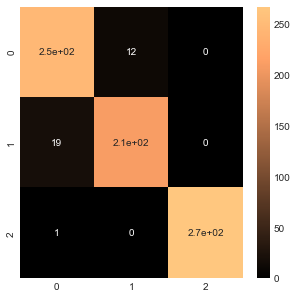

In [60]:
fun(lg)

Score 0.9715747583854463
Accuracy Score 95.62913907284768
Confusion Matrix
 [[246  12   0]
 [ 20 209   0]
 [  1   0 267]]
Classification Report
               precision    recall  f1-score   support

           0       0.92      0.95      0.94       258
           1       0.95      0.91      0.93       229
           2       1.00      1.00      1.00       268

    accuracy                           0.96       755
   macro avg       0.96      0.95      0.95       755
weighted avg       0.96      0.96      0.96       755



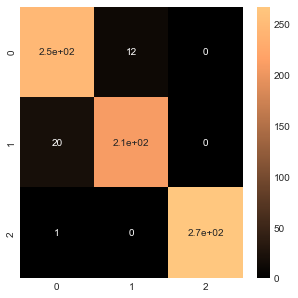

In [61]:
fun(svc)

Score 1.0
Accuracy Score 90.72847682119205
Confusion Matrix
 [[226  26   6]
 [ 25 202   2]
 [ 10   1 257]]
Classification Report
               precision    recall  f1-score   support

           0       0.87      0.88      0.87       258
           1       0.88      0.88      0.88       229
           2       0.97      0.96      0.96       268

    accuracy                           0.91       755
   macro avg       0.91      0.91      0.91       755
weighted avg       0.91      0.91      0.91       755



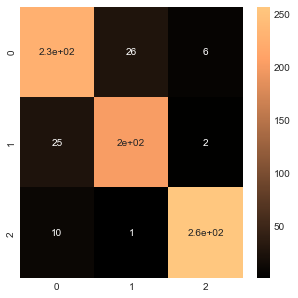

In [62]:
fun(dtc)

Score 0.9107447413303013
Accuracy Score 89.00662251655629
Confusion Matrix
 [[207  51   0]
 [ 23 206   0]
 [  3   6 259]]
Classification Report
               precision    recall  f1-score   support

           0       0.89      0.80      0.84       258
           1       0.78      0.90      0.84       229
           2       1.00      0.97      0.98       268

    accuracy                           0.89       755
   macro avg       0.89      0.89      0.89       755
weighted avg       0.90      0.89      0.89       755



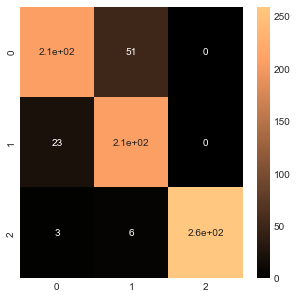

In [63]:
fun(gb)

Score 0.9471290505969301
Accuracy Score 92.18543046357615
Confusion Matrix
 [[227  29   2]
 [ 19 209   1]
 [  7   1 260]]
Classification Report
               precision    recall  f1-score   support

           0       0.90      0.88      0.89       258
           1       0.87      0.91      0.89       229
           2       0.99      0.97      0.98       268

    accuracy                           0.92       755
   macro avg       0.92      0.92      0.92       755
weighted avg       0.92      0.92      0.92       755



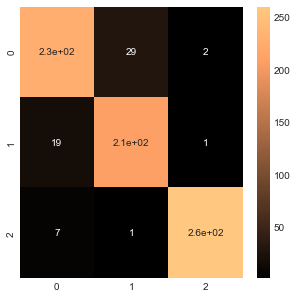

In [64]:
fun(knn)

Score 0.9499715747583855
Accuracy Score 93.37748344370861
Confusion Matrix
 [[240  18   0]
 [ 32 197   0]
 [  0   0 268]]
Classification Report
               precision    recall  f1-score   support

           0       0.88      0.93      0.91       258
           1       0.92      0.86      0.89       229
           2       1.00      1.00      1.00       268

    accuracy                           0.93       755
   macro avg       0.93      0.93      0.93       755
weighted avg       0.93      0.93      0.93       755



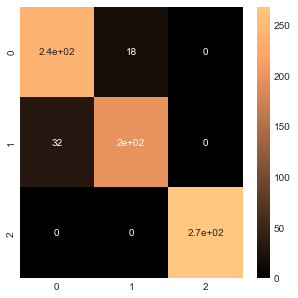

In [65]:
fun(sgdc)

Score 1.0
Accuracy Score 93.64238410596026
Confusion Matrix
 [[233  22   3]
 [ 19 209   1]
 [  2   1 265]]
Classification Report
               precision    recall  f1-score   support

           0       0.92      0.90      0.91       258
           1       0.90      0.91      0.91       229
           2       0.99      0.99      0.99       268

    accuracy                           0.94       755
   macro avg       0.93      0.93      0.93       755
weighted avg       0.94      0.94      0.94       755



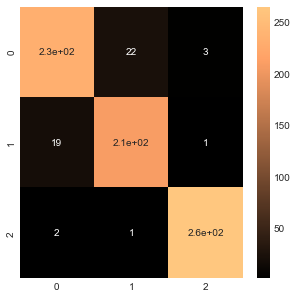

In [66]:
fun(rndf)
pred=rndf.predict(x_test)

In [67]:
gd=GradientBoostingClassifier()
ad=AdaBoostClassifier()

Score 0.8953951108584423
Accuracy Score 87.54966887417218
Confusion Matrix
 [[241  17   0]
 [ 67 162   0]
 [ 10   0 258]]
Classification Report
               precision    recall  f1-score   support

           0       0.76      0.93      0.84       258
           1       0.91      0.71      0.79       229
           2       1.00      0.96      0.98       268

    accuracy                           0.88       755
   macro avg       0.89      0.87      0.87       755
weighted avg       0.89      0.88      0.88       755



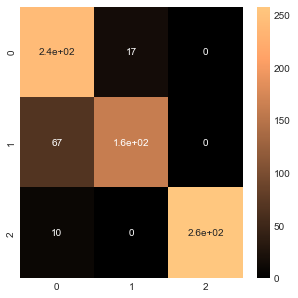

In [68]:
fun(ad)
pred=ad.predict(x_test)

Score 0.9909039226833428
Accuracy Score 94.43708609271523
Confusion Matrix
 [[237  19   2]
 [ 19 210   0]
 [  2   0 266]]
Classification Report
               precision    recall  f1-score   support

           0       0.92      0.92      0.92       258
           1       0.92      0.92      0.92       229
           2       0.99      0.99      0.99       268

    accuracy                           0.94       755
   macro avg       0.94      0.94      0.94       755
weighted avg       0.94      0.94      0.94       755



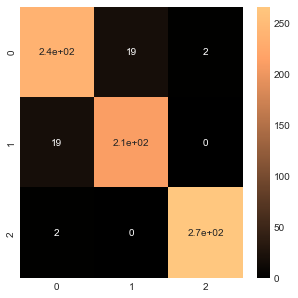

In [69]:
fun(gd)
pred=gd.predict(x_test)

In [70]:
score=cross_val_score(svc,x,y,cv=5)
print("score of cross validation score for svc", score.mean()*100)
score=cross_val_score(dtc,x,y,cv=5)
print("score of cross validation score for Decisiontreeclassifier",score.mean()*100)
score=cross_val_score(knn,x,y,cv=5)
print("score of cross validation score for knn",score.mean()*100)
score=cross_val_score(gb,x,y,cv=5)
print("score of cross validation score for GausianNB classifier",score.mean()*100)
score=cross_val_score(rndf,x,y,cv=4)
print("score of cross validation score for Randomforest classifier",score.mean()*100)
score=cross_val_score(ad,x,y,cv=4)
print('score of cross validation score for Adaboost classifier',score.mean()*100)
score=cross_val_score(gd,x,y,cv=4)
print("score of cross validation score for Gradientboost classifier",score.mean()*100)

score of cross validation score for svc 95.90354288610963
score of cross validation score for Decisiontreeclassifier 94.62990978432195
score of cross validation score for knn 90.17583740584382
score of cross validation score for GausianNB classifier 89.57822784409085
score of cross validation score for Randomforest classifier 95.58709608822011
score of cross validation score for Adaboost classifier 88.2290917744271
score of cross validation score for Gradientboost classifier 96.46187963909956


In [71]:
grid_param = {
    'criterion' : ['gini','entropy'],
    'max_depth' : range(2,40,3),
    'min_samples_leaf' : range(1,20,2),
    'min_samples_split' : range(2,30,2),
    'splitter' : ['best','random']
}


grid_search = GridSearchCV(estimator = dtc,
                     param_grid = grid_param,
                     cv = 5,
                     n_jobs =-1)

grid_search.fit(x_train,y_train)


best_parameters = grid_search.best_params_
print(best_parameters)

grid_search.best_score_

{'criterion': 'entropy', 'max_depth': 11, 'min_samples_leaf': 5, 'min_samples_split': 6, 'splitter': 'best'}


0.9016559829059829

In [78]:
dtc1 = DecisionTreeClassifier(criterion= 'entropy', max_depth= 7, min_samples_leaf= 3, min_samples_split= 3, splitter= 'best')
dtc1.fit(x_train,y_train)

dtc1.score(x_test,y_test)

0.9072847682119205

In [79]:
gd1 = GradientBoostingClassifier()
parameters = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}

grid_search = GridSearchCV(estimator = gd1,
                     param_grid = parameters,
                     cv = 5,
                     n_jobs =-1)

grid_search.fit(x_train,y_train)


best_parameters = grid_search.best_params_
print(best_parameters)


{'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 250}


In [80]:
gd1 = GradientBoostingClassifier(n_estimators= 250, max_depth= 1, learning_rate= 0.1)
gd1.fit(x_train,y_train)

gd1.score(x_test,y_test)

0.937748344370861

In [81]:
p2={'n_estimators':[10,50,100,250,500],'max_depth':[1,2,3,4,5],'max_features':['auto','sqrt','log2']}
rf1=GridSearchCV(rndf,p2)
rf1.fit(x,y)
print(rf1.best_params_)

{'max_depth': 5, 'max_features': 'auto', 'n_estimators': 10}


Score 0.9948834565093804
Accuracy Score 93.37748344370861
Confusion Matrix
 [[235  19   4]
 [ 23 205   1]
 [  3   0 265]]
Classification Report
               precision    recall  f1-score   support

           0       0.90      0.91      0.91       258
           1       0.92      0.90      0.91       229
           2       0.98      0.99      0.99       268

    accuracy                           0.93       755
   macro avg       0.93      0.93      0.93       755
weighted avg       0.93      0.93      0.93       755



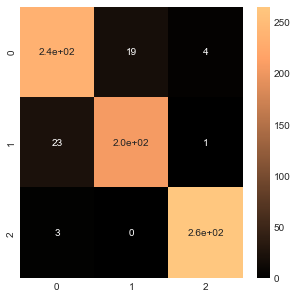

In [82]:
rndf1=RandomForestClassifier(max_depth=100,max_features='auto',n_estimators=10)
fun(rndf1)

In [85]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(x_train, y_train)
print(grid.best_params_)
print(grid.best_estimator_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.534, total=   0.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.554, total=   0.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.560, total=   0.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.526, total=   0.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.550, total=   0.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.935, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.932, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.966, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.932, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.943, total=   0.1s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:   14.6s finished


Score 0.961910176236498
Accuracy Score 95.09933774834437
Confusion Matrix
 [[239  19   0]
 [ 18 211   0]
 [  0   0 268]]
Classification Report
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       258
           1       0.92      0.92      0.92       229
           2       1.00      1.00      1.00       268

    accuracy                           0.95       755
   macro avg       0.95      0.95      0.95       755
weighted avg       0.95      0.95      0.95       755



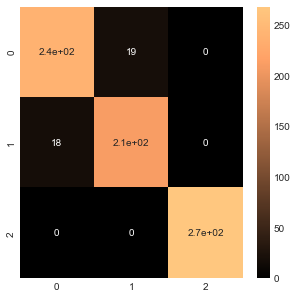

In [90]:
svc1=SVC(C=100,gamma=0.0001,kernel='rbf')
fun(svc1)

In [91]:
score=cross_val_score(dtc1,x,y,cv=4)
print("score of cross validation score for DecisonTreeclassifier",score.mean()*100)
score=cross_val_score(gd1,x,y,cv=4)
print('score of cross validation score for GradientBoostingClassifier',score.mean()*100)
score=cross_val_score(rndf1,x,y,cv=4)
print("score of cross validation score for RandomForestClassifier",score.mean()*100)
score=cross_val_score(svc1,x,y,cv=4)
print("score of cross validation score for svc Classifier",score.mean()*100)

score of cross validation score for DecisonTreeclassifier 95.38760847771714
score of cross validation score for GradientBoostingClassifier 96.22340587121403
score of cross validation score for RandomForestClassifier 94.83110639676768
score of cross validation score for svc Classifier 95.22875254422651


In [96]:
import pickle
filename='skyserver.pkl'
pickle.dump(gd1,open(filename,'wb'))

      Actual  Predict
1321       1        1
242        0        0
2484       2        2
1709       2        2
280        0        0
...      ...      ...
1112       1        1
1869       2        2
2421       2        2
2300       2        2
1104       1        1

[755 rows x 2 columns]


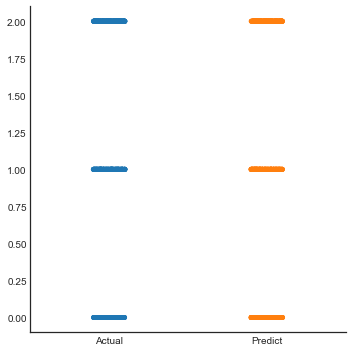

In [97]:
res=pd.DataFrame()
res['Actual']=y_test
res['Predict']=svc.predict(x_test)
print(res)
sns.catplot(data=res)

### THANK YOU